In [47]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import pandas as pd
import math

In [3]:
# Mostly around 12 degrees Kelvin within precision of .4 degrees Kelvin
# There is some random data in here that will throw this off, properly idenitfy and throw out
# the data that does not match the distribution

IN our first problem we are looking at the meta-data associated with an experiment, to get accurate readings, the temp should be somewhere around 12 K within a .4 degree precision of the reading. However, there are times when the control system misbehaved and the temp was not even close to 12 K. There are also glitches in the thermometer that gives way too high and low readings. The goal is to throw all of that data out when the thermometer was not working. 

In [4]:
#this sets the size of the plot to something useful
plt.rcParams["figure.figsize"] = (15,20)

Text(0,0.5,'Probability')

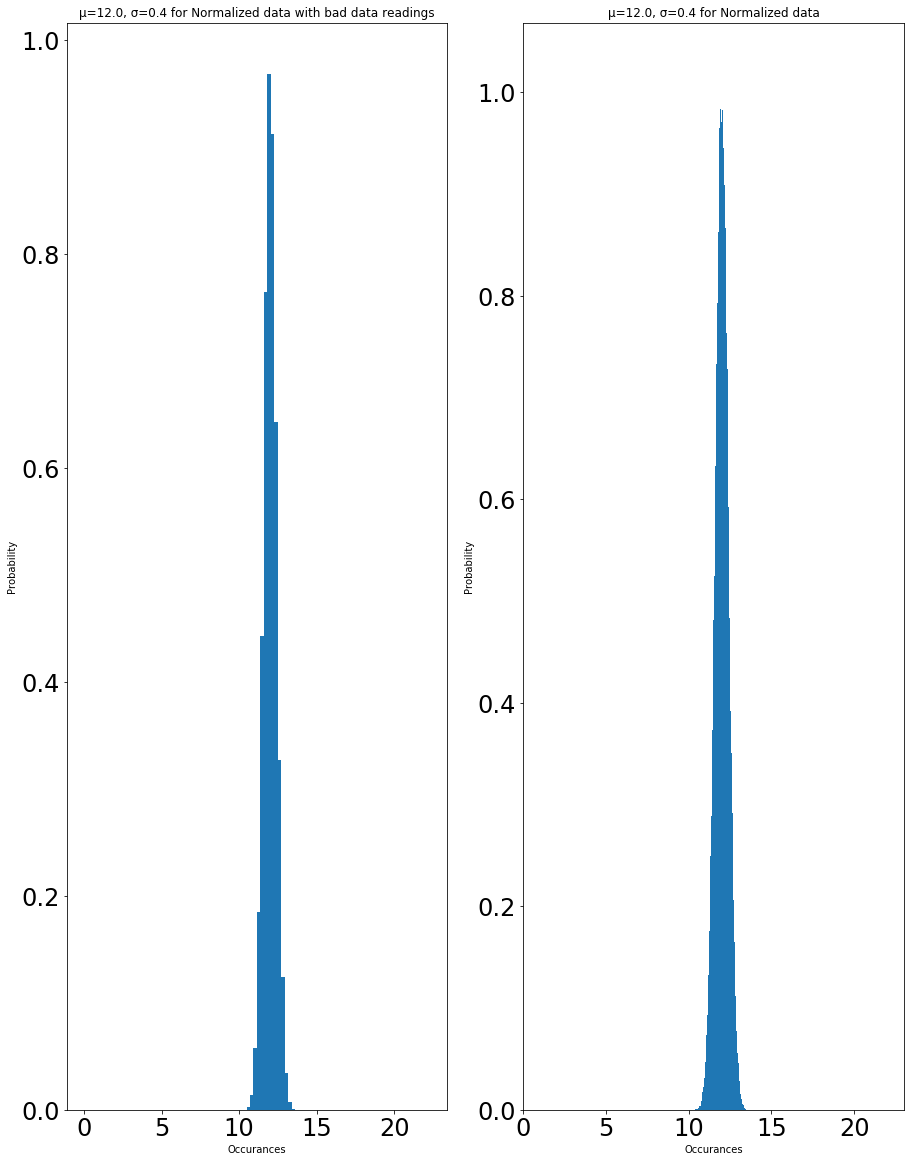

In [7]:
# Plot comparing the graphs of the Signal Normal Distribution and the true Normal Distribution 

mu = 12.; sigma = .4; siz = 100000
signal_distro = np.append(stats.norm.rvs(loc = mu, scale = sigma, size = siz), [10., 10.3, 2.1, 0., 0., 15.6, 22.3, 12.7])
normal_distro = stats.norm.rvs(loc = mu, scale = sigma, size = siz)
fig, (ax,ax1) = plt.subplots(1, 2)
                          
ax.set_title(label=f"\u03bc={mu}, \u03C3={sigma} for Normalized data with bad data readings")
ax.hist(signal_distro,100, density=True)
ax.tick_params(labelsize = 24)
#x = np.linspace(mu-5*sigma,mu+5*sigma,100)
#ax.plot(x,stats.norm.pdf(x,loc = mu, scale = sigma), linewidth = 5, alpha = 1)
ax.set_xlabel('Occurances')
ax.set_ylabel("Probability")
                         
ax1.set_title(label=f"\u03bc={mu}, \u03C3={sigma} for Normalized data")
ax1.hist(normal_distro,100, density=True)
ax1.tick_params(labelsize = 24)
ax1.set_xlim([0, 23])
#x = np.linspace(mu-5*sigma,mu+5*sigma,100)
#ax.plot(x,stats.norm.pdf(x,loc = mu, scale = sigma), linewidth = 5, alpha = 1)
ax1.set_xlabel('Occurances')
ax1.set_ylabel('Probability')

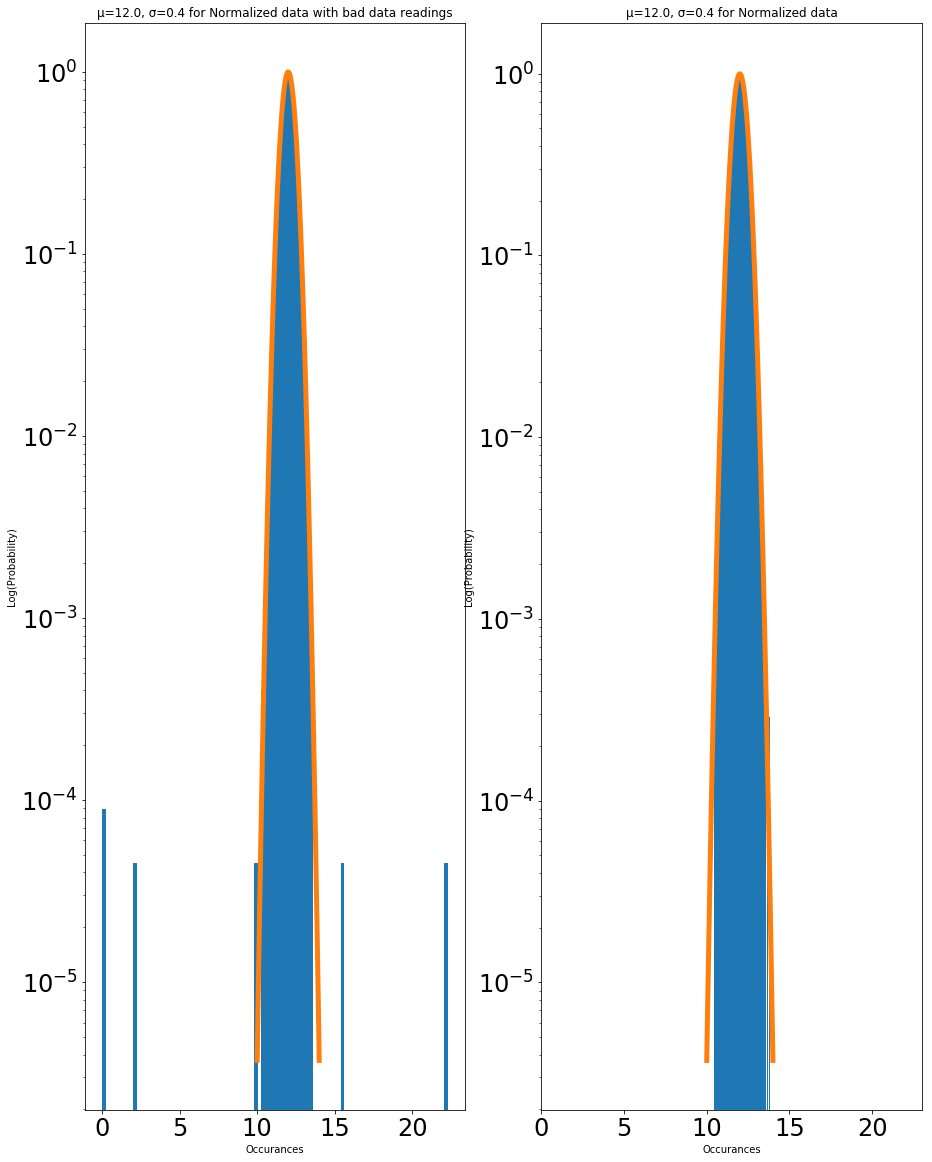

In [8]:
# Plot comparing the graphs of the Log Signal Normal Distribution and the Log true Normal Distribution 

mu = 12.; sigma = .4; siz = 100000
signal_distro = np.append(stats.norm.rvs(loc = mu, scale = sigma, size = siz), [10., 10.3, 2.1, 0., 0., 15.6, 22.3, 12.7])
normal_distro = stats.norm.rvs(loc = mu, scale = sigma, size = siz)
fig, (ax,ax1) = plt.subplots(1, 2)
                          
ax.set_title(label=f"\u03bc={mu}, \u03C3={sigma} for Normalized data with bad data readings")
ax.hist(signal_distro,100, density=True)
ax.tick_params(labelsize = 24)
x = np.linspace(mu-5*sigma,mu+5*sigma,100)
ax.plot(x,stats.norm.pdf(x,loc = mu, scale = sigma), linewidth = 5, alpha = 1)
ax.set_xlabel('Occurances')
ax.set_ylabel('Log(Probability)')
ax.set_yscale('log')
                          
ax1.set_title(label=f"\u03bc={mu}, \u03C3={sigma} for Normalized data")
ax1.hist(normal_distro,100, density=True)
ax1.tick_params(labelsize = 24)
ax1.set_xlim([0, 23])
x = np.linspace(mu-5*sigma,mu+5*sigma,100)
ax1.plot(x,stats.norm.pdf(x,loc = mu, scale = sigma), linewidth = 5, alpha = 1)
ax1.set_xlabel('Occurances')
ax1.set_ylabel('Log(Probability)')
ax1.set_yscale('log')

My goal is to compare the normal distribution within 5$\sigma$. I will then compare the x values of the signal distribtion to that of the normal distribution within 5$\sigma$. 
- If the data point should lay within the distribution and it is observed that it does, then it will equal TT. 
- If the data point should lay within the distribution and it is observed that it does NOT, then it will equal BT.
- If the data point should not lay within the distribution and it is observed that it does, then it will equal TB.
-  If the data point should not lay within the distribution and it is observed that it does not, then it will equal BB.

Percentage of occurances that appear as a signal: 0.00000029
Sigma value associated with percentage: 5.000


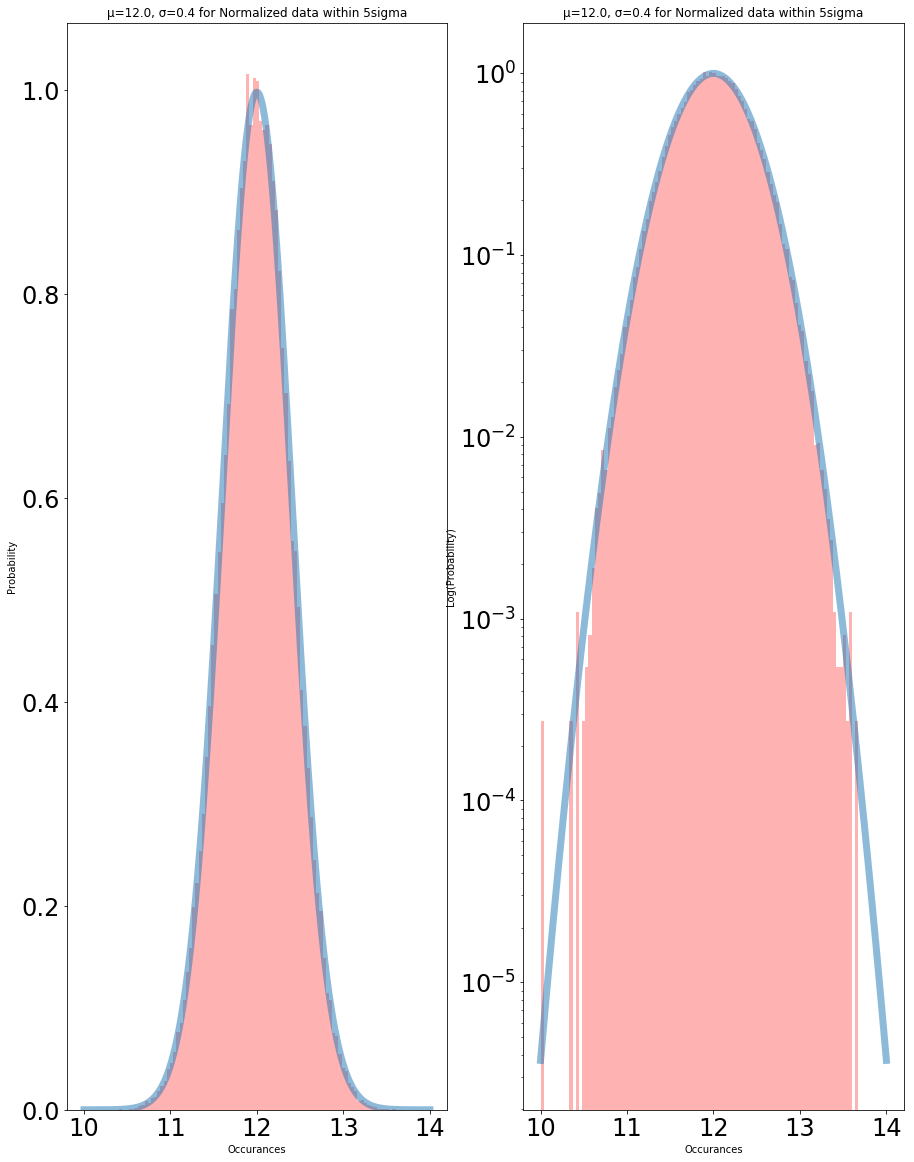

In [27]:
mu = 12.; sigma = .4; siz = 100000
signal_distro = np.append(stats.norm.rvs(loc = mu, scale = sigma, size = siz), [10., 10.3, 2.1, 0., 0., 15.6, 22.3, 12.7])
normal_distro = stats.norm.rvs(loc = mu, scale = sigma, size = siz)
fig, (ax, ax1) = plt.subplots(1, 2)
                          
ax.set_title(label=f"\u03bc={mu}, \u03C3={sigma} for Normalized data within 5sigma")
ax.hist(normal_distro,100, density=True, color='r', alpha=.3)
ax.tick_params(labelsize = 24)
x = np.linspace(mu-5*sigma,mu+5*sigma,1000)
ax.plot(x,stats.norm.pdf(x,loc = mu, scale = sigma), linewidth = 7, alpha = .5)
ax.set_xlabel('Occurances')
ax.set_ylabel('Probability')
#ax.set_yscale('log')

ax1.set_title(label=f"\u03bc={mu}, \u03C3={sigma} for Normalized data within 5sigma")
ax1.hist(normal_distro,100, density=True, color='r', alpha=.3)
ax1.tick_params(labelsize = 24)
x = np.linspace(mu-5*sigma,mu+5*sigma,1000)
ax1.plot(x,stats.norm.pdf(x,loc = mu, scale = sigma), linewidth = 7, alpha = .5)
ax1.set_xlabel('Occurances')
ax1.set_ylabel('Log(Probability)')
ax1.set_yscale('log')

#fill_space = np.linspace(mu-5*sigma,mu+5*sigma,1000)
#ax.fill_between(fill_space, stats.norm.pdf(fill_space,loc = mu, scale = sigma), color = 'g', linewidth = 0, alpha = .9)

prob = 1 - stats.norm.cdf(mu + sigma*5,mu, sigma)
z_val = stats.norm.ppf(1-(prob))

print(f'Percentage of occurances that appear as a signal: {prob:.8f}')
print(f'Sigma value associated with percentage: {z_val:.3f}')

We see that even when we do take the 5$\sigma$ of the normal distribution without any signal, we do yield a percentage that will occur as a signal, although this is a rather small probability, it will still contribute to some error. 

In [20]:
loc=12; scale=.4
data = pd.DataFrame(signal_distro, columns=['Signal_data'])
prob_5_sigma = 1/3.5e6
high_bound = stats.norm.ppf(1 - prob_5_sigma/2, loc, scale)
low_bound = stats.norm.ppf(prob_5_sigma/2, loc, scale)
new_points = data.query(f'{low_bound} < Signal_data < {high_bound}')
print(f'The 5\u03C3 bounds are located between {low_bound:.4f} and {high_bound:.4f}')
print(f'There are now {len(new_points)} data points')

The 5σ bounds are located between 9.9469 and 14.0531
There are now 100003 data points


The blue lines are the 5$\sigma$ values for the normal distribution which is to be expected, the purple represents the overlap between the normal and signal distribution, and the red is from the signal distribution

|         | True T (100k) | Bad T (8) |
|---      |---            |---        |
|Test Good| 100,000        |   3       |
| Test Bad|     0         |   5       |

I could throw out more data by lowering the Sigma value. I could have a sigma value that would be less than 5$\sigma$. I would then be omitting good data to ensure that I had fewer Bad T and Test Good. On the flip side there would then be more True T and Test Bad. This statistical threshold is determined by how much you want to 'squeeze' the data to make sure that every point fits the data, but you would have to throw out some good data points to do so. Yes this is a predictable because you can calculate where the probability under a certain curve is the same for each distribution. Therefore, you would omit good data, but would ensure that there would be no Bad T and Test Good. I will show this by lowering my sigma value until there are no more Bad T and Test Good. 


In [22]:
loc=12; scale=.4
data = pd.DataFrame(signal_distro, columns=['Signal_data'])
prob_17_sigma = 1 - .91086
high_bound = stats.norm.ppf(1 - prob_17_sigma/2, loc, scale)
low_bound = stats.norm.ppf(prob_17_sigma/2, loc, scale)
new_points = data.query(f'{low_bound} < Signal_data < {high_bound}')
print(f'The 1.7\u03C3 bounds are located between {low_bound:.4f} and {high_bound:.4f}')
print(f'There are now {len(new_points)} data points')

The 5σ bounds are located between 11.3200 and 12.6800
There are now 91043 data points


I see that around 1.7$\sigma$ is the tipping point to where we see no more Bad T and Test Good. If having that error is so bad, then this is how you would want to use the data set. 

|         | True T (100k) | Bad T (8) |
|---      |---            |---        |
|Test Good| 91,163        |   0       |
| Test Bad|     8,837         |   8       |

The number of ommissions would change based on my Sigma value. If I went over the 5$\sigma$ value then I would technically cover more of the distribution. The problem would be that I would 'spill' over the distribution and there might be some data points that were identified as Bad T and Test B might now become Bad T and Test Good. Now, we have to pick our poison. Would we rather cover more area and identify more True T as Good T while letting more Bad T and Test Good. This is ultimately up to what you are studying and trying to answer. It depends on the question at hand and what can potentially be 'worse' for whatever question you are answering. 

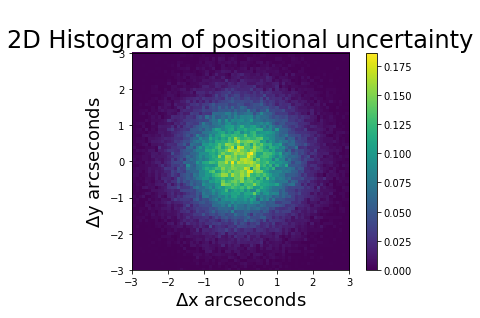

In [43]:
a = np.vstack((stats.norm.rvs( scale = 1, size = 100000), stats.norm.rvs( scale = 1, size = 100000)))
a.shape
fig, ax = plt.subplots(1, 1)
h = ax.hist2d(a[0,:],a[1,:],bins=100, normed=True);
ax.set_aspect('equal', 'box')
plt.xlim([-3 , 3])
plt.ylim([-3 , 3])
plt.title("2D Histogram of positional uncertainty", fontsize = 24)
plt.ylabel("$\Delta$y arcseconds", fontsize = 18)
plt.xlabel("$\Delta$x arcseconds", fontsize = 18)
plt.colorbar(h[3], ax=ax)

Boy did I have fun with this, after doing a lot of research via wikipedia I found out that you can take two normal gaussian distributions to create a Rayleigh distribution. If X ~ N(0, $\sigma$^2) and Y ~ N(0, $\sigma$^2), then Rayleigh($\sigma$) = (X^2 + Y^2)^(1/2). This was found under the Related Distributions page in wikipedia

arcseonds associate with a 5σ bound at the center of the distro: 2.7448 


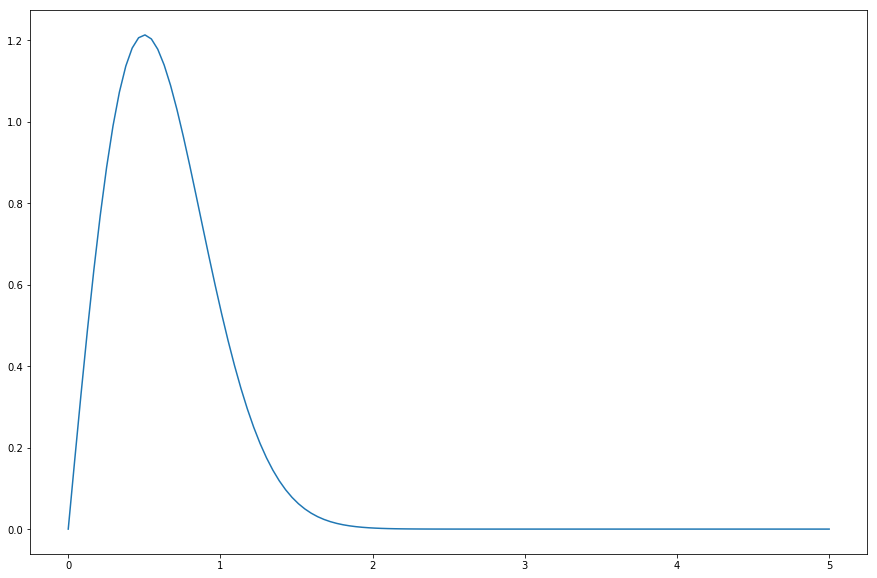

In [102]:
# The Sigma value will also drop by a factor of 2 when taking the sum of two identical gaussian distributions
loc=0; scale=1/2;
fig, ax = plt.subplots(1, 1, figsize = (15,10))
x = np.linspace(0, 5, 120)
err_data = stats.rayleigh.pdf(x, loc, scale)
ax.plot(x, err_data)
prob_5_sigma = 1/3.5e6
loc_5_sigma = stats.rayleigh.ppf(1 - prob_5_sigma, loc, scale)
print(f'arcseonds associate with a 5\u03C3 bound at the center of the distro: {loc_5_sigma:.4f} ')


For a nice change of pace we see that gamma rays come in at about 1 per minute in a region of interest. The question we are trying to answer is as follows: If there were 6800 gamma rays detected over 15 days where each day there were 8 hours of detection, how significant would detection be given background noise. I will be using a Poisson plot because here we know that there are no dependent situations that depend on one another. All these scenarios are independent. So, I will take 1 gamma ray per minute and colve this 7200 times to get the new background distribution. I will find the 5\$sigma$ to determine if this is a significant result. Even though I convolve, this distribution will still remain a Poisson distro because each convolution increases the time of collection and does not affect the distribution as a whole. This was seen in lab 2. 

Probability of a detection: 1.0133280183917768e-06
Sigma value for the given percentage: 4.750748


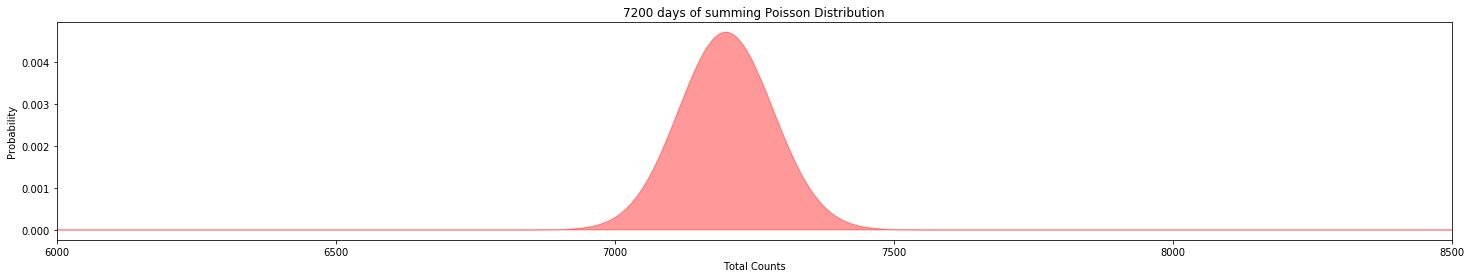

In [103]:
error = 1; off = 0
fig, (ax) = plt.subplots(1, 1, figsize = (25,4))
x = np.linspace(0, 7, 8)
err_data = stats.poisson.pmf(x, error, off)


days = 7200

y1 = np.convolve(err_data, err_data)
for i in range(2, days):
    y1 = np.convolve(y1, err_data)
    
ax.set_title('7200 days of summing Poisson Distribution')
x_new = np.linspace(0, 7*days, 7*days+1)
ax.plot(x_new, y1, 'ro', lw=0, ms=10/days, label = f'{days} days')
ax.vlines(x_new, 0, y1, colors='r', lw=5/days, alpha=1)
ax.fill_between(x_new, stats.poisson.pmf(x_new, error*days, off), color = 'r', linewidth = 1, alpha = .4)
prob = stats.poisson.cdf(6800, error*days, off)
ax.set_xlim(6000, 8500)
ax.set_xlabel('Total Counts')
ax.set_ylabel('Probability')

probability = stats.poisson.cdf(6800, error*days, off)
z_val = (stats.norm.ppf(1-(prob)))
print(f'Probability of a detection: {probability}')
print(f'Sigma value for the given percentage: {z_val:.6f}')


We can still treat this as a continuous distribution, even though the measurements stop and start, because we only care about the total number of collected gamma rays. Therefore, we did not need to use a trials factor in our calculation. If the question asked about the significance of a single day out of the 1 that had collected x amount of rats, then we would include the trials factor. The reason we convolve 7200 times because 1 min * 60 min/hour * 8 hour/day * 15 day = 7200.